In [1]:
"""
@author: Mahesh Gaya
@date: September 23rd, 2016
@description: predicting data for titanic
@datafile: titanicFull.csv
"""
#Library import
import math
import random
import copy #to create copy of list so they don't have the same reference
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get Titanic data
#Exercise 1
file = open("titanicFull.csv", "r")
list = [] #original data
#Get data and format them
for line in file:
    fLine = line.replace("\n", "")
    sLine = fLine.rsplit(",")
    list.append(sLine)
#print(list)

#Get header
#Exercise 2
header = list[0]
#print(header) 
"""
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
"""
#print(len(header)) #length=11 (0-10)

#get data
#Exercise 3
titanic_data = [] #data for titanic, excluding header
for n in range(len(list)):
    if (n > 0): #ignore the header
        titanic_data.append(list[n])
#print(titanic_data)

#show list in a nice way
def print_pretty(list):
    for row in list:
        print(row)
#print_pretty(titanic_data)


In [3]:
#Exercise 4 
#Clean up data
#Fill in missing data
#Find average
sum_ages = num = 0
for n in range(len(titanic_data)):
    if (titanic_data[n][5] != ''): #if not empty/blank
        sum_ages = sum_ages + float(titanic_data[n][5])
        num = num + 1 #get how many times it was executed
average = float(sum_ages/num)
#print("sum: " + str(sum_ages))
#print("num: " + str(num))
#print("ave: " + str(average))

#replace missing values for ages with average

In [4]:
#Exercise 5
for n in range(len(titanic_data)):
    if (titanic_data[n][5] == ""): #if empty/blank
        titanic_data[n][5] = str("{:10.1f}".format(average))
#print_pretty(titanic_data)

def is_empty(list, column):
    checklist = []
    for n in range(len(list)):
        if (list[n][column] == ""):
            checklist.append(n)
    return checklist
#verify if any of the ages is still blank
#is_empty(titanic_data, 5) #Good to go

In [5]:
#Exercise 6
#Fill in data for  embark
#Check how many c, s, and Q are there
def check_embark():
    checklist = []
    c_survived = c_not_survived = 0
    q_survived = q_not_survived = 0
    s_survived = s_not_survived = 0
    
    c = q = s = 0
    for n in range(len(titanic_data)):
        if (titanic_data[n][11] == "C" or titanic_data[n][11] == "c"):
            if (titanic_data[n][0] == '1'):
                c_survived = c_survived + 1
            elif (titanic_data[n][0] == '0'):
                c_not_survived = c_not_survived + 1
            c = c + 1
            
        if (titanic_data[n][11] == "Q" or titanic_data[n][11] == "q"):
            if (titanic_data[n][0] == '1'):
                q_survived = q_survived + 1
            elif (titanic_data[n][0] == '0'):
                q_not_survived = q_not_survived + 1
            q = q + 1
            
        if (titanic_data[n][11] == "S" or titanic_data[n][11] == "s"):
            if (titanic_data[n][0] == '1'):
                s_survived = s_survived + 1
            elif (titanic_data[n][0] == '0'):
                s_not_survived = s_not_survived + 1
            s = s + 1
            
        if (titanic_data[n][11] == ""):
            print("empty @ " + str(n) + " -- survived? " + titanic_data[n][0])
    
    print("c survived? Yes: " + str(c_survived) + " -- No: " + str(c_not_survived))
    print("q survived? Yes: " + str(q_survived) + " -- No: " + str(q_not_survived))
    print("s survived? Yes: " + str(s_survived) + " -- No: " + str(s_not_survived))
    
    checklist.append(c)
    checklist.append(q)
    checklist.append(s)
    return checklist
check_embark()

#replace missing value with Cabin
#Reasoning: Percentage of survival for cabin is bigger
titanic_data[129][11] = "C"
titanic_data[853][11] = "C"
#print(titanic_data[129])
#print(titanic_data[853])

empty @ 129 -- survived? 1
empty @ 853 -- survived? 1
c survived? Yes: 93 -- No: 75
q survived? Yes: 30 -- No: 47
s survived? Yes: 217 -- No: 427


In [6]:
#Exercise 7
#Convert data needed to float
def convert_to_float(list_data, column):
    for n in range(len(list_data)):
        if (list_data[n][column] != ""): #handles blank values
            list_data[n][column] = float(list_data[n][column])
        
    return list_data
def convert_them():
    #convert survived[row=0] to float
    convert_to_float(titanic_data, 0)
    #convert pclass[row=1]
    convert_to_float(titanic_data, 1)
    #convert age[row=5]
    convert_to_float(titanic_data, 5)
    #convert sibSp[row=6]
    convert_to_float(titanic_data, 6)
    #convert parch[row=7]
    convert_to_float(titanic_data, 7)
    #convert fare[row=9]
    convert_to_float(titanic_data, 9)
    #print_pretty(titanic_data)
convert_them()

In [7]:
#Exercise 8
#convert sex
def convert_sex(list_data):
    for n in range(len(list_data)):
        if (list_data[n][4] == "male"):
            list_data[n][4] = 0
        elif (list_data[n][4] == "female"):
            list_data[n][4] = 1
    return list_data
convert_sex(titanic_data)

#convert embark
#c = 1, q = 2, s = 3
def convert_embark(list_data):
    for n in range(len(list_data)):
        if (list_data[n][11] == "C"):
            list_data[n][11] = 1
        elif (list_data[n][11] == "Q"):
            list_data[n][11] = 2
        elif (list_data[n][11] == "S"):
            list_data[n][11] = 3
    return list_data
convert_embark(titanic_data)

[[1.0,
  1.0,
  '"Dodge',
  ' Master. Washington"',
  0,
  4.0,
  0.0,
  2.0,
  '33638',
  81.8583,
  'A34',
  3],
 [0.0,
  3.0,
  '"Williams',
  ' Mr. Howard Hugh ""Harry"""',
  0,
  29.7,
  0.0,
  0.0,
  'A/5 2466',
  8.05,
  '',
  3],
 [1.0,
  1.0,
  '"Peuchen',
  ' Major. Arthur Godfrey"',
  0,
  52.0,
  0.0,
  0.0,
  '113786',
  30.5,
  'C104',
  3],
 [1.0,
  3.0,
  '"Sandstrom',
  ' Miss. Marguerite Rut"',
  1,
  4.0,
  1.0,
  1.0,
  'PP 9549',
  16.7,
  'G6',
  3],
 [1.0,
  2.0,
  '"Richards',
  ' Master. William Rowe"',
  0,
  3.0,
  1.0,
  1.0,
  '29106',
  18.75,
  '',
  3],
 [0.0,
  2.0,
  '"Collander',
  ' Mr. Erik Gustaf"',
  0,
  28.0,
  0.0,
  0.0,
  '248740',
  13.0,
  '',
  3],
 [1.0,
  2.0,
  '"Mellinger',
  ' Mrs. (Elizabeth Anne Maidment)"',
  1,
  41.0,
  0.0,
  1.0,
  '250644',
  19.5,
  '',
  3],
 [0.0,
  3.0,
  '"Sage',
  ' Miss. Constance Gladys"',
  1,
  29.7,
  8.0,
  2.0,
  'CA. 2343',
  69.55,
  '',
  3],
 [1.0,
  1.0,
  '"Bjornstrom-Steffansson',
  ' Mr. M

In [8]:
#Exercise 9
#Distance Function 
#Fields we care: (0 -- exclude), 1, 5, 6, 7, 9
def calc_distance(row1, row2):
    col1 = (row1[1] - row2[1])**2
    col5 = (row1[5] - row2[5])**2
    col6 = (row1[6] - row2[6])**2
    col7 = (row1[7] - row2[7])**2
    col9 = (row1[9] - row2[9])**2
    distance = math.sqrt(col1 + col5 + col6 + col7 + col9)
    return distance

#test
calc_distance(titanic_data[0], titanic_data[10])

50.21844494446239

In [9]:
#Exercise 10
#shuffle titanic_data
random.shuffle(titanic_data)
#print_pretty(titanic_data)
#Split data
total_rows = len(titanic_data)
ten_percent_rows = int((10/100)*total_rows)
#print(str(total_rows) + " " + str(ten_percent_rows))
test_data = titanic_data[0:ten_percent_rows]
train_data = titanic_data[ten_percent_rows:]
#print(str(len(test_data)))
#print(str(len(train_data)))
#print(test_data)
#print(train_data)

In [10]:
#Exercise 11
def find_1nn(row, train_list):
    nearest_row = []
    min_distance = float("inf") #minimum distance
    for data in train_list:
        distance = calc_distance(row, data)
        if (distance <= min_distance):
            min_distance = distance
            #print(min_distance) #test
            nearest_row = data
    #print(nearest_row)
    return nearest_row[0]

print(find_1nn(test_data[0], train_data))

1.0


In [11]:
#Exercise 12
#Test all
def test_all_data_1nn(test_list):
    predictions = []
    for data in test_list:
        predictions.append(find_1nn(data, train_data))
    return predictions
print(test_all_data_1nn(test_data))

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]


In [17]:
#Test all
def test_all_data_knn(k, test_list, train_list, decision):
    predictions = []
    for data in test_list:
        if (decision == 1): #1 for unweighted, 2 for weighted
            predictions.append(find_knn(k, data, train_list))
        else:
            predictions.append(find_weighted_knn(k, data, train_list))
    return predictions
print(test_all_data_knn(50, test_data, train_data, 1))
#print(train_data)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
#Exercise 13
#Check Accuracy
def check_accuracy_knn(list_data, list_to_check):
    accuracy = 0.0
    correct_prediction = 0
    #[row][column]
    for row in range(len(list_data)):
        if (list_data[row][0] == list_to_check[row]):
            correct_prediction = correct_prediction + 1
    accuracy = float(correct_prediction/len(list_data))
    return accuracy
print("accuracy: " + str(check_accuracy_knn(test_data, test_all_data_1nn(test_data))))
original_titanic_data = copy.copy(titanic_data)
print(id(original_titanic_data))
print(id(titanic_data))

accuracy: 0.6404494382022472
4503939976
4467256712


In [18]:
check_accuracy_knn(test_data,test_all_data_knn(50, test_data, train_data, 1))
#print(test_data)
#print(normalized_test_data)

0.651685393258427

In [13]:
def find_knn(k, row, list):
    nearest_row = []
    min_distance = [] #minimum distance
    predictions = [] 
    
    #Initialize
    for m in range(k):
        min_distance.append(float("inf"))
        nearest_row.append("")
        predictions.append(0.0)
        
    for data in list:
        distance = calc_distance(row, data)
        for n in range(k):
            #print(n)
            #print(min_distance[n])
            if (distance <= min_distance[n]):
                min_distance[n] = distance
                #print(min_distance) #test
                nearest_row[n] = data
                predictions[n] = nearest_row[n][0]
                break
            min_distance.sort()
        
    sum0 = 0
    sum1 = 0
    for n in range(len(predictions)):
        if (predictions[n] == 0):
            sum0 = sum0 + 1
        else:
            sum1 = sum1 + 1
    value = -1
    if (sum0 >= sum1):
        value = 0
    else:
        value = 1
    #print("sum0: " + str(sum0) + " - sum1: " + str(sum1) + " -- " + str(value))
    return float(value)

print(find_knn(50, test_data[0], train_data))
print(test_data[0])

#Good above

0.0
[1.0, 3.0, '"Bing', ' Mr. Lee"', 0, 32.0, 0.0, 0.0, '1601', 56.4958, '', 3]


In [14]:
#Normalize data
#Fields we care: (0 -- exclude), 1, 5, 6, 7, 9
def normalize_data(list_data):
    normalized_list = []
    sum1 = sum5 = sum6 = sum7 = sum9 = 0.0
    #find mean
    for row in range(len(list_data)):
        sum1 = sum1 + list_data[row][1]
        sum5 = sum5 + list_data[row][5]
        sum6 = sum6 + list_data[row][6]
        sum7 = sum7 + list_data[row][7]
        sum9 = sum9 + list_data[row][9]
    mean1 = sum1/(len(list_data))
    mean5 = sum5/(len(list_data))
    mean6 = sum6/(len(list_data))
    mean7 = sum7/(len(list_data))
    mean9 = sum9/(len(list_data))
    
    square_diff1 = square_diff5 = square_diff6 = 0.0
    square_diff7 = square_diff9 = 0.0
    for row in range(len(titanic_data)):
        square_diff1 = square_diff1 + (mean1 - list_data[row][1])**2
        square_diff5 = square_diff5 + (mean5 - list_data[row][5])**2
        square_diff6 = square_diff6 + (mean6 - list_data[row][6])**2
        square_diff7 = square_diff7 + (mean7 - list_data[row][7])**2
        square_diff9 = square_diff9 + (mean9 - list_data[row][9])**2
    stdev1 = math.sqrt(square_diff1/len(list_data))
    stdev5 = math.sqrt(square_diff5/len(list_data))
    stdev6 = math.sqrt(square_diff6/len(list_data))
    stdev7 = math.sqrt(square_diff7/len(list_data))
    stdev9 = math.sqrt(square_diff9/len(list_data))
    
    #Add z-score ((xi - mean)/stdev)
    normalized_titanic_data = copy.copy(list_data)
    for row in range(len(normalized_titanic_data)):
        normalized_titanic_data[row][1] = (normalized_titanic_data[row][1] - mean1)/stdev1
        normalized_titanic_data[row][5] = (normalized_titanic_data[row][5] - mean5)/stdev5
        normalized_titanic_data[row][6] = (normalized_titanic_data[row][6] - mean6)/stdev6
        normalized_titanic_data[row][7] = (normalized_titanic_data[row][7] - mean7)/stdev7
        normalized_titanic_data[row][9] = (normalized_titanic_data[row][9] - mean9)/stdev9
    
    return normalized_titanic_data
#Why is copying a list so hard in Python, argghhh!!!
list_to_normalized = copy.deepcopy(titanic_data) 
normalized_titanic_data = normalize_data(list_to_normalized)
#data has already been shuffled before, so no need for that here
normalized_test_data = normalized_titanic_data[0:ten_percent_rows]
normalized_train_data = normalized_titanic_data[ten_percent_rows:]
print(normalized_titanic_data[0])
print(titanic_data[0])
print(normalized_titanic_data[1])
print(titanic_data[1])

[1.0, 0.8273772438659678, '"Bing', ' Mr. Lee"', 0, 0.17704941880498717, -0.47454519624983965, -0.47367360929845614, '1601', 0.4891036068168479, '', 3]
[1.0, 3.0, '"Bing', ' Mr. Lee"', 0, 32.0, 0.0, 0.0, '1601', 56.4958, '', 3]
[1.0, -1.5661069258891536, '"Kenyon', ' Mrs. Frederick R (Marion)"', 1, 5.4412167161554435e-05, 0.4327933656785019, -0.47367360929845614, '17464', 0.3958135606752518, 'D21', 3]
[1.0, 1.0, '"Kenyon', ' Mrs. Frederick R (Marion)"', 1, 29.7, 1.0, 0.0, '17464', 51.8625, 'D21', 3]


In [15]:
#Exercise 14
def find_weighted_knn(k, row, list_data):
    nearest_row = []
    min_distance = [] #minimum distance
    predictions = [] 
    
    #Initialize
    for m in range(k):
        min_distance.append(float("inf"))
        nearest_row.append("")
        predictions.append(0.0)
        
    for data in list_data:
        distance = calc_distance(row, data)
        for n in range(k):
            #print(n)
            #print(min_distance[n])
            if (distance <= min_distance[n]):
                min_distance[n] = distance
                #print(min_distance) #test
                nearest_row[n] = data
                if (distance != 0):
                    weighted_distance = 1/(distance**2)
                else:
                    weighted_distance = 0.000001
                if (weighted_distance < 0.5):
                    predictions[n] = 0
                else:
                    predictions[n] = 1
                break
            min_distance.sort()
    #print(predictions)
    sum0 = 0
    sum1 = 0
    for n in range(len(predictions)):
        if (predictions[n] == 0):
            sum0 = sum0 + 1
        else:
            sum1 = sum1 + 1
    value = -1
    
    if (sum0 >= sum1):
        value = 0
    else:
        value = 1
    #print("sum0: " + str(sum0) + " - sum1: " + str(sum1) + " -- " + str(value))
    return float(value)
print(find_weighted_knn(50, normalized_test_data[0], normalized_train_data))
print(find_knn(50, test_data[0], train_data))
print(normalized_test_data[0])
print(test_data[0])

1.0
0.0
[1.0, 0.8273772438659678, '"Bing', ' Mr. Lee"', 0, 0.17704941880498717, -0.47454519624983965, -0.47367360929845614, '1601', 0.4891036068168479, '', 3]
[1.0, 3.0, '"Bing', ' Mr. Lee"', 0, 32.0, 0.0, 0.0, '1601', 56.4958, '', 3]


In [19]:
#test the functions
weighted_knn = []
knn = []
normalized_weighted_knn = []
normalized_knn = []
#check_accuracy_knn(test_data,test_all_data_knn(50, test_data, train_data ,1))
#find_weighted_knn(1, normalized_test_data[0], normalized_train_data)
for k in [1, 3, 5, 10, 25, 50, 75, 100,150, 175, 180, 190, 200]:
    weighted_knn.append(check_accuracy_knn(test_data,test_all_data_knn(k, test_data, train_data , 2)))
    knn.append(check_accuracy_knn(test_data,test_all_data_knn(k, test_data, train_data ,1)))
    normalized_weighted_knn.append(check_accuracy_knn(normalized_test_data, test_all_data_knn(k, normalized_test_data, normalized_train_data , 2)))
    normalized_knn.append(check_accuracy_knn(normalized_test_data, test_all_data_knn(k, normalized_test_data, normalized_train_data ,1)))
    
print(weighted_knn)
print(knn)
print(normalized_weighted_knn)
print(normalized_knn)

[0.47191011235955055, 0.34831460674157305, 0.4044943820224719, 0.5280898876404494, 0.6292134831460674, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472]
[0.6404494382022472, 0.6741573033707865, 0.6966292134831461, 0.7078651685393258, 0.6741573033707865, 0.651685393258427, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472]
[0.43820224719101125, 0.34831460674157305, 0.34831460674157305, 0.33707865168539325, 0.30337078651685395, 0.38202247191011235, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472]
[0.6292134831460674, 0.651685393258427, 0.6741573033707865, 0.7303370786516854, 0.7191011235955056, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.6404494382022472, 0.64044943

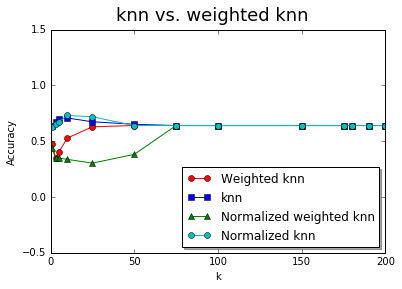

In [20]:
#Exercise 15
#Plotting
xvals = []
for n in [1, 3, 5, 10, 25, 50, 75, 100,150, 175, 180, 190, 200]:
    xvals.append(n)


#series 1 will be weighted knn
series1 = weighted_knn
#series 2 will be unweighted knn
series2 = knn
#series 3 will be normalized weighted knn
series3 = normalized_weighted_knn
#series 4 will be normalized knn
series4 = normalized_knn

plt.suptitle("knn vs. weighted knn",fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.plot(xvals, series1, 'ro-', label="Weighted knn")
plt.plot(xvals, series2, 'bs-', label="knn")
plt.plot(xvals, series3, 'g^-', label="Normalized weighted knn")
plt.plot(xvals, series4, 'co-', label="Normalized knn")

plt.legend(loc="lower right", shadow=True)
plt.axis([0,200,-0.5,1.5])
plt.show()


In [ ]:
#check fields
"""
Fields we care: 0, 1, 5, 6, 7, 9
['Survived', 'Pclass', 'FirstName', 'LastName', 'Sex', 'Age', 'SibSp', 
    0           1          2            3         4      5        6
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    7       8         9       10        11
length of columns: 12
"""
def check_fields():
    for n in range(len(titanic_data[0])):
        print(titanic_data[0][n])
    print (len(titanic_data[0]))